# Time Series Analysis 


This is a Dataset for Stock Prediction on Apple Inc and it is taken from Kaggle for project purpose. This dataset start from 1980 to 2021 . It was collected from Yahoo Finance. 

In this notebook we will apply deep learning technics like Recurrent Neural Networks (RNN) and Long-Short Term Memory (LSTM) to forecast and predict market stock price.

# Importing Necessary Libraries 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Activation , Dropout
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('AAPL.csv')
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600
...,...,...,...,...,...,...,...
10267,2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700
10268,2021-09-02,153.869995,154.720001,152.399994,153.649994,153.649994,71115500
10269,2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700
10270,2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300


# Feature Analysis 

<b>Date</b> = Date from 1980 to 2021

<b>Open</b> = It is the price at which the financial security opens in the market when trading begins

<b>High</b> = The high is the highest price at which a stock traded during a period.

<b>Low</b> = Low is the minimum price of a stock in a period

<b>Close</b> = Closing price generally refers to the last price at which a stock trades during a regular trading                      session

<b>Adj Close</b> = The adjusted closing price amends a stock's closing price to reflect that stock's value after                          accounting for any

<b>Volume</b> = Volume measures the number of shares traded in a stock or contracts traded in futures or options.





Here we are predicting on 'Close' Variable using Deep learning models

Let's check for the null value first 


In [3]:
data.Close.isnull().sum()

0

In [4]:
#making DataFrame 

df = data[['Date','Close']]
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10267,2021-09-01,152.509995
10268,2021-09-02,153.649994
10269,2021-09-03,154.300003
10270,2021-09-07,156.690002


# Applying necessary Feature Transformation 

In [5]:
#converting Close variable from object to float data type

df['Close'] = df['Close'].apply(lambda x: float(x))
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10267,2021-09-01,152.509995
10268,2021-09-02,153.649994
10269,2021-09-03,154.300003
10270,2021-09-07,156.690002


In [6]:
df.Close.dtype

dtype('float64')

In [7]:
#making a datetime row with using Date Variable 

def make_date(row):
    return datetime(year = int(row.split('-')[0]),
                   month = int(row.split('-')[1]),
                   day = int(row.split('-')[2]))

df['Date'] = df['Date'].apply(make_date)
df.set_index(df.Date, inplace = True)
df.drop(columns = 'Date', inplace = True)


In [8]:
df.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


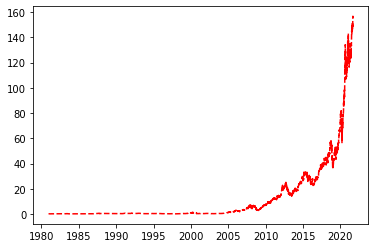

In [9]:
#plotting values through timestep 

plt.plot(df, 'r--')

As we one can trend is increasing rapidly from 2010 onwards.
So inorder to work with stable dataset we will take values from timestep 2010 to 2021

In [10]:
#making a dataframe from timestep 2010-2021

df = df[df.index > datetime(2009,12,31)]
df

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2021-09-01,152.509995
2021-09-02,153.649994
2021-09-03,154.300003


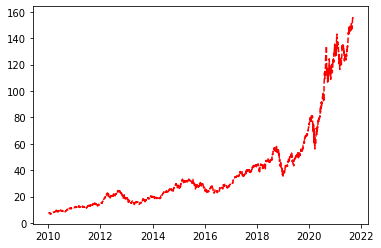

In [11]:
plt.plot(df, 'r--')

Much better 
but we still need to apply feature scaling to make it more stable 

# Applying feature scaling and splitting our data 



In [12]:
periods = 50 

Train = df[:len(df) - periods]['Close'].values
Test = df[len(Train):]['Close'].values

Train = Train.reshape(Train.shape[0],1)
Test = Test.reshape(Test.shape[0],1)

In [13]:
len(Test)

50

In [14]:
mm = MinMaxScaler(feature_range = (0,1))
train = mm.fit_transform(Train)


In [15]:
#making a train_X and train_y dataset with sets of sequence

train_X = []
train_y = []

for i in range (periods, train.shape[0]):
    train_X.append(train[i-periods:i,0])
    train_y.append(train[i,0])

train_X = np.array(train_X)
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
train_y = np.array(train_y)

In [16]:
print('Training data shape: {}'.format(train_X.shape))
print('Training outcome shape: {}'.format(train_y.shape))

Training data shape: (2841, 50, 1)
Training outcome shape: (2841,)


In [17]:
test_data = df[len(df) - len(Test) - periods:]
test_data = mm.transform(test_data)

test_X = []

for i in range(periods, 100):
    test_X.append(test_data[i-periods:i,0])
    
test_X = np.array(test_X)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
test_X.shape

(50, 50, 1)

# Training RNN and LSTM model 

- Creating Simple RNN with 50 hidden layer and LSTM with 70 hidden layer 
- Using 'mean squared error' as a loss function 
- For optimizer using 'Adam'
- 100 epochs to train our model 
- predicting and plotting the results

# RNN



In [18]:
model = Sequential()
model.add(SimpleRNN(50, activation= 'tanh', 
                   input_shape = (train.shape[1],1), return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation = 'tanh',
                   return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation = 'tanh',
                   return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation = 'tanh'))

model.add(Dense(1))





2022-05-07 19:27:54.268841: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
#Lets check how many weight paramters we have to train
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1, 50)             2600      
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1, 50)             5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 1, 50)             5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5

In [ ]:
#compile and training our model
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(train_X, train_y, epochs = 100, batch_size = 32, verbose =1)

Epoch 1/100


2022-05-07 19:27:54.507650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


89/89 [==============================] - 5s 34ms/step - loss: 0.0599
Epoch 2/100
89/89 [==============================] - 3s 33ms/step - loss: 0.0095
Epoch 3/100
89/89 [==============================] - 3s 32ms/step - loss: 0.0051
Epoch 4/100
89/89 [==============================] - 3s 32ms/step - loss: 0.0040
Epoch 5/100
89/89 [==============================] - 3s 28ms/step - loss: 0.0035
Epoch 6/100
89/89 [==============================] - 3s 31ms/step - loss: 0.0026
Epoch 7/100
89/89 [==============================] - 3s 31ms/step - loss: 0.0023
Epoch 8/100
57/89 [==================>...........] - ETA: 0s - loss: 0.0020

In [ ]:
#prediction
pred = model.predict(test_X)
pred = mm.inverse_transform(pred)

#plotting
plt.figure(figsize = (10,5), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.plot(Test, color = 'k', label = 'Actual price')
plt.plot(pred, color = 'r', label = 'Predicted price')
plt.legend()
plt.grid(True)
plt.show()


 As we can notice, our model did not do much bad and but it can be lot better
 

# LSTM

In [ ]:
model2 = Sequential()
model2.add(LSTM(70, activation = 'tanh',
              input_shape = (train_X.shape[1],1)))
model2.add(Dense(1))


In [ ]:
#summary
model2.summary()

In [ ]:
#compiling and fitting
model2.compile(loss = 'mean_squared_error', optimizer = 'adam')
model2.fit(train_X, train_y, epochs = 100, batch_size =32, verbose =1)

In [ ]:
#predicting and plotting 

pred_2 = model2.predict(test_X)
pred_2 = mm.inverse_transform(pred_2)

plt.figure(figsize = (10,5), dpi =80, facecolor = 'w', edgecolor = 'k')
plt.plot(Test, color = 'k', label = 'Actual price')
plt.plot(pred_2, color = 'r', label = 'Predicted price')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion

As one can notice LSTM did fairly well reducing the error and predicting it close to our actual value compared to RNN
and the main reason would be that over a long period simple RNN model are more prone to "Vanishing Gradients" 
Hence, they are not able to keep hold of past memory 

Above problem has been solved by LSTM which remembers significant parameters and holds them for long period of time 
compared to Simple RNN

# Next Step

- To ensure better prediction, we can use more epochs while training our model with both RNN and LSTM 
- We can construct more efficient RNN and LSTM model architecture to get better results
- We can use more data for training and try predict out on holdout set